dimensions de X: (2000, 2)
dimensions de y: (2000,)


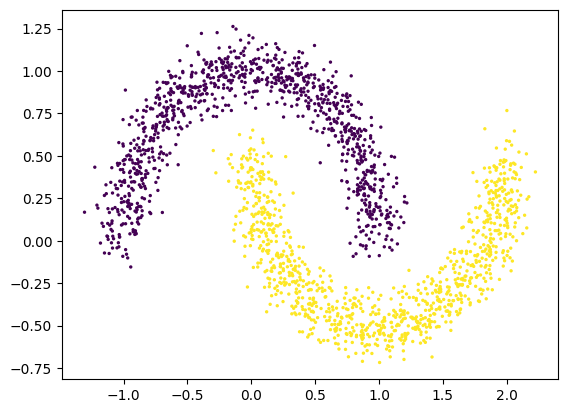

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
n_samples =2000;
np.random.seed(0)
Data, labels = datasets.make_moons(n_samples, noise=0.10)
print('dimensions de X:', Data.shape)
print('dimensions de y:', labels.shape)
plt.scatter(Data[:, 0], Data[:, 1], c=labels, s=2, cmap='viridis')

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.2, random_state=42)

# Réseau de neurones
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialisation aléatoire des poids et biais
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2 + 1e-10

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calcul de la perte (loss)
            loss = -y.T.dot(np.log(output)) - (1 - y).T.dot(np.log(1 - output))
            d_output = output - y
            # Calcul du gradient
            d_output = output - y
            d_hidden = d_output.dot(self.W2.T) * self.a1 * (1 - self.a1)

            # Mise à jour des poids et biais
            self.W2 -= learning_rate * self.a1.T.dot(d_output)
            self.b2 -= learning_rate * d_output.sum(axis=0)
            self.W1 -= learning_rate * X.T.dot(d_hidden)
            self.b1 -= learning_rate * d_hidden.sum(axis=0)

            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int)



In [5]:
# Entraînement du réseau
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1
learning_rate = 0.1
epochs = 1000




In [6]:
# Réorganiser les étiquettes y_train pour les dimensions correctes
y_train = y_train.reshape(-1, 1)
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X_train, y_train, learning_rate, epochs)



Epoch 0, Loss: [[1421.51318738]]
Epoch 10, Loss: [[nan]]
Epoch 20, Loss: [[nan]]
Epoch 30, Loss: [[nan]]
Epoch 40, Loss: [[nan]]
Epoch 50, Loss: [[nan]]
Epoch 60, Loss: [[nan]]
Epoch 70, Loss: [[nan]]
Epoch 80, Loss: [[nan]]
Epoch 90, Loss: [[nan]]
Epoch 100, Loss: [[nan]]
Epoch 110, Loss: [[nan]]
Epoch 120, Loss: [[nan]]
Epoch 130, Loss: [[nan]]
Epoch 140, Loss: [[nan]]
Epoch 150, Loss: [[nan]]
Epoch 160, Loss: [[nan]]
Epoch 170, Loss: [[nan]]
Epoch 180, Loss: [[nan]]
Epoch 190, Loss: [[nan]]
Epoch 200, Loss: [[nan]]
Epoch 210, Loss: [[nan]]
Epoch 220, Loss: [[nan]]
Epoch 230, Loss: [[nan]]


<ipython-input-4-8e27466f94a3>:33: RuntimeWarning: invalid value encountered in log
  loss = -y.T.dot(np.log(output)) - (1 - y).T.dot(np.log(1 - output))
<ipython-input-4-8e27466f94a3>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 240, Loss: [[nan]]
Epoch 250, Loss: [[nan]]
Epoch 260, Loss: [[nan]]
Epoch 270, Loss: [[nan]]
Epoch 280, Loss: [[nan]]
Epoch 290, Loss: [[nan]]
Epoch 300, Loss: [[nan]]
Epoch 310, Loss: [[nan]]
Epoch 320, Loss: [[nan]]
Epoch 330, Loss: [[nan]]
Epoch 340, Loss: [[nan]]
Epoch 350, Loss: [[nan]]
Epoch 360, Loss: [[nan]]
Epoch 370, Loss: [[nan]]
Epoch 380, Loss: [[nan]]
Epoch 390, Loss: [[nan]]
Epoch 400, Loss: [[nan]]
Epoch 410, Loss: [[nan]]
Epoch 420, Loss: [[nan]]
Epoch 430, Loss: [[nan]]
Epoch 440, Loss: [[nan]]
Epoch 450, Loss: [[nan]]
Epoch 460, Loss: [[nan]]
Epoch 470, Loss: [[nan]]
Epoch 480, Loss: [[nan]]
Epoch 490, Loss: [[nan]]
Epoch 500, Loss: [[nan]]
Epoch 510, Loss: [[nan]]
Epoch 520, Loss: [[nan]]
Epoch 530, Loss: [[nan]]
Epoch 540, Loss: [[nan]]
Epoch 550, Loss: [[nan]]
Epoch 560, Loss: [[nan]]
Epoch 570, Loss: [[nan]]
Epoch 580, Loss: [[nan]]
Epoch 590, Loss: [[nan]]
Epoch 600, Loss: [[nan]]
Epoch 610, Loss: [[nan]]
Epoch 620, Loss: [[nan]]
Epoch 630, Loss: [[nan]]


In [7]:
# Prédiction et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision sur l\'ensemble de test : {accuracy}')


Précision sur l'ensemble de test : 0.7875


<ipython-input-4-8e27466f94a3>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<ipython-input-4-8e27466f94a3>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


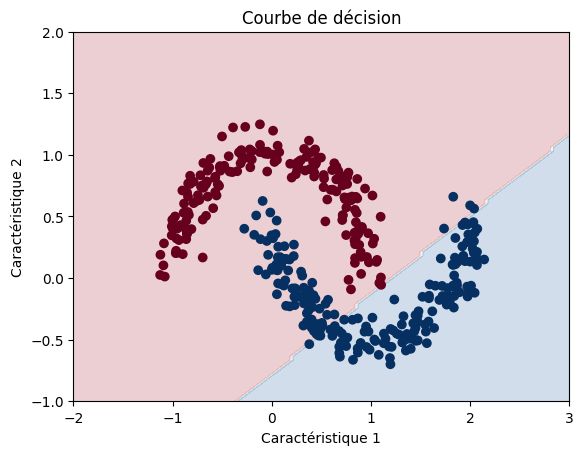

In [8]:
# Affichage de la courbe de décision
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1, 2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
decision_boundary = model.predict(X_grid).reshape(xx.shape)
plt.contourf(xx, yy, decision_boundary, cmap=plt.cm.RdBu, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='o')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Courbe de décision')
plt.show()
